In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Constants
IMG_HEIGHT = 64
IMG_WIDTH = 64
NUM_CHANNELS = 3
NUM_CLASSES = 29  # A-Z, del, nothing, space

def load_data(data_dir):
    images = []
    labels = []
    class_mapping = {}
    
    for idx, class_name in enumerate(sorted(os.listdir(data_dir))):
        class_mapping[idx] = class_name
        class_path = os.path.join(data_dir, class_name)
        
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            images.append(image)
            labels.append(idx)
    
    return np.array(images), np.array(labels), class_mapping

def create_model():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

def train_model(model, X_train, y_train, X_val, y_val):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=15, 
                        batch_size=32,
                        validation_data=(X_val, y_val))
    return history

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
def plot_confusion_matrix(y_true, y_pred, class_mapping):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_mapping.values()), yticklabels=list(class_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def main():
    # Load and preprocess data
    data_dir = r'C:\Users\X1 YOGA\Documents\dtset\train'
    images, labels, class_mapping = load_data(data_dir)
    
    # Normalize pixel values
    images = images.astype('float32') / 255.0
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = create_model()
    history = train_model(model, X_train, y_train, X_val, y_val)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_classes, class_mapping)
    
    # Plot training history
    plot_training_history(history)
    
    # Save the model
    model.save('sign_language_model1.h5')

if __name__ == "__main__":
    main()


C:\Users\X1 YOGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 649s 459ms/step - accuracy: 0.3557 - loss: 7.0593 - val_accuracy: 0.5001 - val_loss: 4.2023 - learning_rate: 0.0010
Epoch 2/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 698s 501ms/step - accuracy: 0.7438 - loss: 3.3899 - val_accuracy: 0.7951 - val_loss: 3.2226 - learning_rate: 0.0010
Epoch 3/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 545s 391ms/step - accuracy: 0.7881 - loss: 3.1212 - val_accuracy: 0.7253 - val_loss: 3.1990 - learning_rate: 0.0010
Epoch 4/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 533s 382ms/step - accuracy: 0.7972 - loss: 2.9272 - val_accuracy: 0.8657 - val_loss: 2.6919 - learning_rate: 0.0010
Epoch 5/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 531s 381ms/step - accuracy: 0.8177 - loss: 2.7440 - val_accuracy: 0.8042 - val_loss: 2.6085 - learning_rate: 0.0010
Epoch 6/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 528s 378ms/step - accuracy: 0.8272 - loss: 2.4751 - val_accuracy: 0.7413 - val_loss: 2.6229 - learning_rate: 0.0010
Epoch 7/30
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 551s 395ms

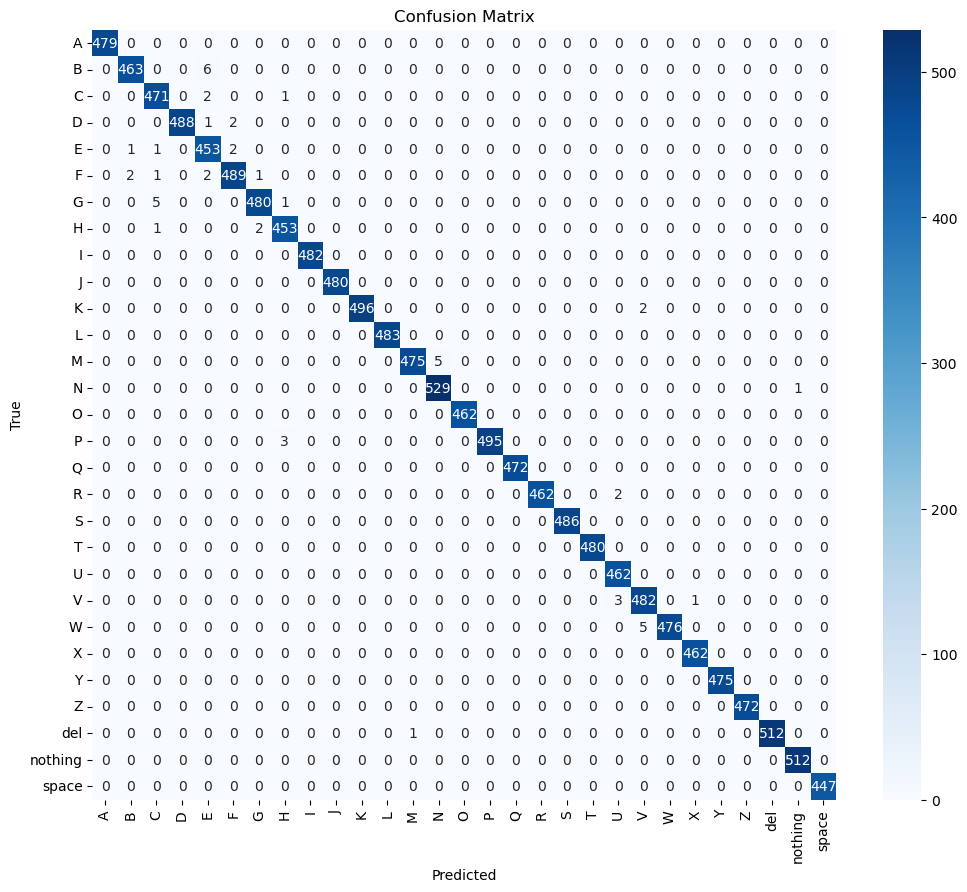

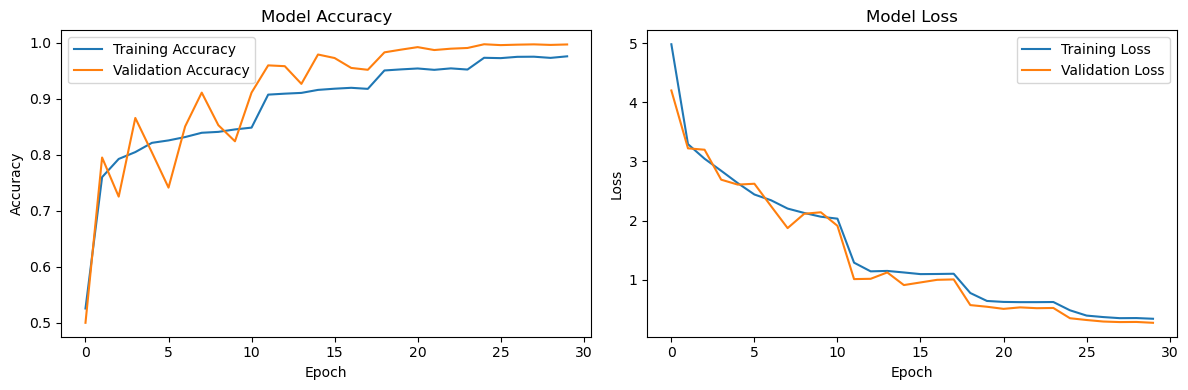

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       479
           B       0.99      0.99      0.99       469
           C       0.98      0.99      0.99       474
           D       1.00      0.99      1.00       491
           E       0.98      0.99      0.98       457
           F       0.99      0.99      0.99       495
           G       0.99      0.99      0.99       486
           H       0.99      0.99      0.99       456
           I       1.00      1.00      1.00       482
           J       1.00      1.00      1.00       480
           K       1.00      1.00      1.00       498
           L       1.00      1.00      1.00       483
           M       1.00      0.99      0.99       480
           N       0.99      1.00      0.99       530
           O       1.00      1.00      1.00       462
           P       1.00      0.99      1.00       498
           Q       1.00      1.00      1.00       472
           R       1.00    

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

# Constants
IMG_HEIGHT = 64
IMG_WIDTH = 64
NUM_CHANNELS = 3
NUM_CLASSES = 29  # A-Z, del, nothing, space

# Function to load data
def load_data(data_dir):
    images = []
    labels = []
    class_mapping = {}
    
    for idx, class_name in enumerate(sorted(os.listdir(data_dir))):
        class_mapping[idx] = class_name
        class_path = os.path.join(data_dir, class_name)
        
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            images.append(image)
            labels.append(idx)
    
    return np.array(images), np.array(labels), class_mapping

# Function to create an improved CNN model with added regularization
def create_improved_cnn_model():
    model = tf.keras.Sequential([
        # Layer 1: Convolution + BatchNorm + ReLU + MaxPooling
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Added Dropout
        
        # Layer 2: Convolution + BatchNorm + ReLU + MaxPooling
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Added Dropout
        
        # Layer 3: Convolution + BatchNorm + ReLU + MaxPooling
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),  # Increased Dropout
        
        # Flatten Layer
        layers.Flatten(),
        
        # Fully Connected Layer + Dropout
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # Output Layer
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

# Function to train the model with dynamic learning rate
def train_model(model, X_train, y_train, X_val, y_val):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    
    history = model.fit(X_train, y_train, 
                        epochs=30, 
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, lr_schedule])
    return history

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_mapping):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_mapping.values()), yticklabels=list(class_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main function
def main():
    # Load and preprocess data
    data_dir = r'C:\Users\X1 YOGA\Documents\dtset\train'
    images, labels, class_mapping = load_data(data_dir)
    
    # Normalize pixel values
    images = images.astype('float32') / 255.0
    
    # Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create and train the improved model
    model = create_improved_cnn_model()
    history = train_model(model, X_train, y_train, X_val, y_val)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_classes, class_mapping)
    
    # Plot training history
    plot_training_history(history)
    
    # Print classification report
    print(classification_report(y_test, y_pred_classes, target_names=list(class_mapping.values())))
    
    # Save the model
    model.save('improved_sign_language_cnn_model.h5')

if __name__ == "__main__":
    main()
